### https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

- Authors:
  - Mathieu Blondel
  - Andreas Mueller
- License: BSD 3 clause

引数 | 概要 | 選択肢 | デフォルト
----------- | ------------ | ----------- | ------------
n_components | ターゲットの次元数 | int | None(そのまま)
kernel | カーネルタイプ | “linear”, “poly”, “rbf”, “sigmoid”, “cosine”	 | "linear"
gamma | rbfとpolyのカーネル係数 | float | 1/n_features
degree | polyの係数 | int | 3
coef0 | polyとsigmoidの独立係数 | float | 1
kernel_params | カーネルのパラメターの名前 | Stringからのmapping | None
alpha | リッジ回帰 |  | 1.0
eigen_solver | 固有値の選択 | "auto", "dense", "arpack" | "auto"
tol | arpackの収束 | float | 0
max_iter | arpackの最大反復回数 | int | None
remove_zeros | 固有値０の削除 | bool | False
random_state | arpackでのrandom_state | RandomState Instance or None | None
n_jobs | 並列作業 | int/None | None

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
np.random.seed(0)

In [3]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

In [4]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)

In [5]:
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X)

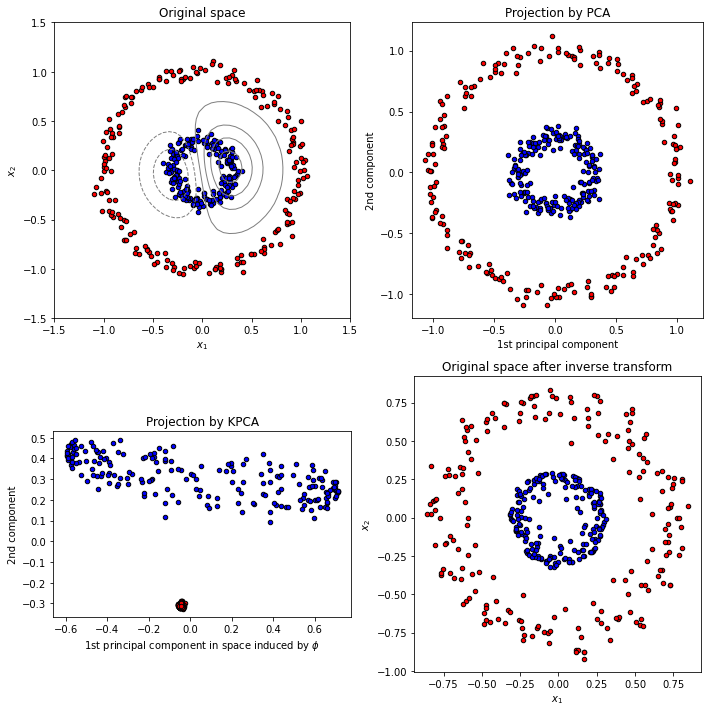

In [10]:
# Plot results

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

### 【Pythonとscikit-learnで機械学習：第22回】

http://neuro-educator.com/ml22/

In [34]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import preprocessing, decomposition #機械学習用のライブラリを利用
from sklearn import datasets #使用するデータ

In [35]:
# 2：moon型のデータを読み込む--------------------------------
X,Y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

In [33]:
X[0]

array([0.81680544, 0.5216447 ])

In [36]:
# 3：データの整形-------------------------------------------------------
sc = preprocessing.StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [32]:
X_norm[0]

array([0.36748451, 0.54576641])

In [37]:
# 4：主成分分析を実施-------------------------------
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_norm_pca = pca.fit_transform(X_norm)

In [38]:
# 解説5：カーネル主成分分析を実施-------------------------------
kpca = decomposition.KernelPCA(n_components=2, kernel='rbf', gamma=20.0)
X_kpca = kpca.fit_transform(X)
X_norm_kpca = kpca.fit_transform(X_norm)

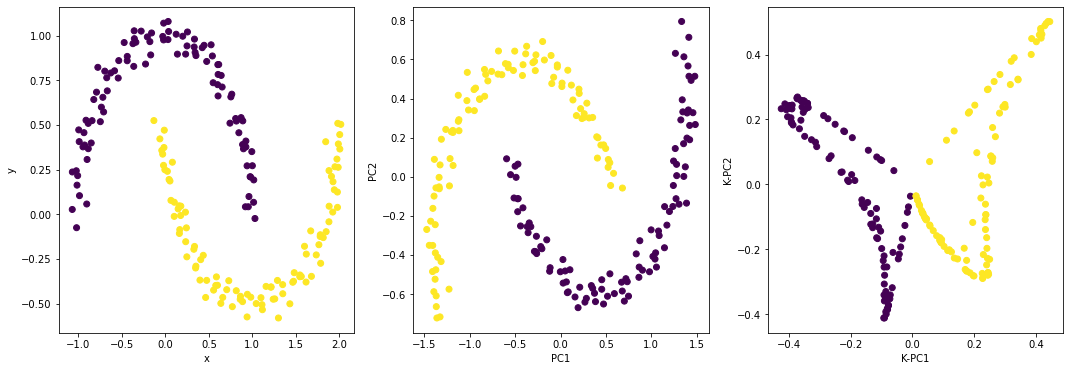

In [39]:
# 6: 結果をプロットする-----------------------------
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
 
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.subplot(1, 3, 3)
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=Y)
plt.xlabel('K-PC1')
plt.ylabel('K-PC2')
 
plt.show()

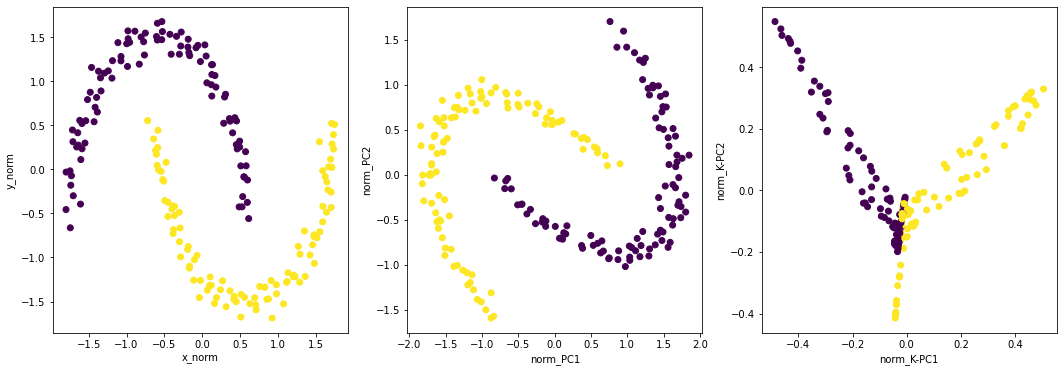

In [40]:
# normalized ver.
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.scatter(X_norm[:,0], X_norm[:,1], c=Y)
plt.xlabel('x_norm')
plt.ylabel('y_norm')
 
plt.subplot(1, 3, 2)
plt.scatter(X_norm_pca[:,0], X_norm_pca[:,1], c=Y)
plt.xlabel('norm_PC1')
plt.ylabel('norm_PC2')
 
plt.subplot(1, 3, 3)
plt.scatter(X_norm_kpca[:,0], X_norm_kpca[:,1], c=Y)
plt.xlabel('norm_K-PC1')
plt.ylabel('norm_K-PC2')
 
plt.show()

### kernel PCA
https://axa.biopapyrus.jp/machine-learning/preprocessing/kernel-pca.html

In [42]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

In [43]:
# download MNIST data
mnist = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(mnist)

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))


In [54]:
print(mnist[0].shape)
## (70000, 784)

(70000, 784)


In [53]:
print(mnist[1].shape)
## (70000,)

(70000,)


In [59]:
# only use the first 10,000 images (to reduce runtime)
img = mnist[0][0:10000]

In [69]:
# standardization
scaler = StandardScaler()
scaler.fit(img)
img_scaled = scaler.transform(img)

In [70]:
# kernel PCA
kpca = KernelPCA(n_components=5, kernel='rbf', gamma=15,
                 fit_inverse_transform=True)
kpca.fit(img_scaled)
img_scaled_kpca = kpca.transform(img_scaled)

In [71]:
# get standardized & kernel PCA-transformed data
img_lowdim = scaler.inverse_transform(kpca.inverse_transform(img_scaled_kpca))

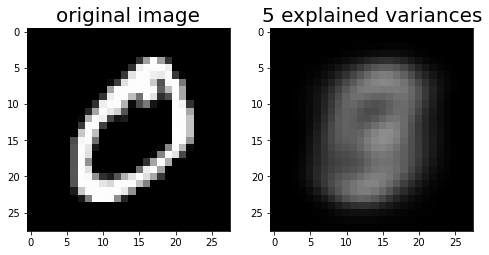

In [72]:
# plot figures
plt.figure(figsize=(8,4));

# original image
plt.subplot(1, 2, 1);
plt.imshow(img[1].reshape(28,28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255));
plt.title('original image', fontsize = 20);

# standardized & PCA-transformed image
plt.subplot(1, 2, 2);
plt.imshow(img_lowdim[1].reshape(28, 28),
           cmap=plt.cm.gray, interpolation='nearest',
           clim=(0, 255));
plt.title('5 explained variances', fontsize = 20);

### 主成分分析からカーネル主成分分析へ
https://masamunetogetoge.com/pca

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

Text(0.5, 1.0, 'PCA with iris data')

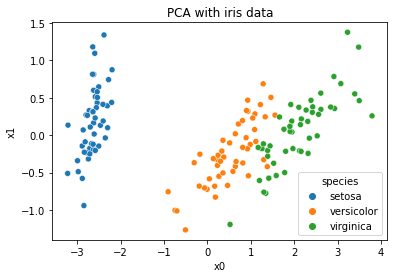

In [74]:
iris = sns.load_dataset('iris') #irisデータのロード
 
species = iris.pop("species") #ラベルは取り出しておく
pca = PCA(n_components=2) #2次元に圧縮準備
pca.fit(iris)
iris_pca = pca.transform(iris)
 
iris_pca_pd = pd.DataFrame(iris_pca)#グラフを描く準備
iris_pca_pd["species"]= species
iris_pca_pd.columns = ["x0","x1", "species"]
 
sns.scatterplot(x="x0", y= "x1", hue="species", data=iris_pca_pd)
plt.title("PCA with iris data")

In [75]:
from sklearn.decomposition import KernelPCA

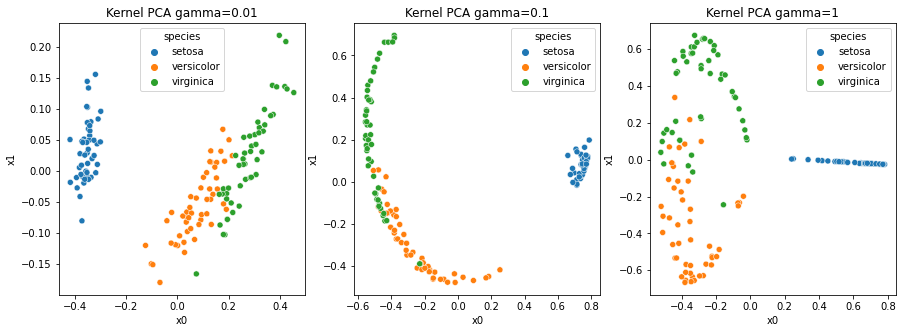

In [86]:
Gam =[0.01, 0.1, 1]

plt.figure(figsize=(15,5))
for i,c in enumerate(Gam):
    plt.subplot(1, 3, i+1)
    pca = KernelPCA(n_components= 2, kernel="rbf", gamma=c)
    iris_pca = pca.fit_transform(iris)
    
    iris_pca_pd = pd.DataFrame(iris_pca)
    iris_pca_pd["species"] = species
    iris_pca_pd.columns = ["x0", "x1", "species"]
    sns.scatterplot(x="x0", y= "x1", hue="species", data=iris_pca_pd)
    plt.title("Kernel PCA gamma={}".format(c))